# Домашняя работа 9. Деревья решений. (32 балла)

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

## Полезная литература

- [Habrahabr: ODS деревья решений](https://habrahabr.ru/company/ods/blog/322534/#derevo-resheniy)
- [ВМК МГУ семинары по решающим деревьям](https://github.com/esokolov/ml-course-msu/blob/master/ML16/lecture-notes/Sem04_trees.pdf)
- [Sklearn Decision Trees](http://scikit-learn.org/stable/modules/tree.html)

## 1. Сравнение моделей деревьев

В этом блоке вы сравните разные конфигурации композиций деревьев:
- DecisionTree
- Bagging
- Bagging с другими настройками подбора признаков для разбиения
- RandomForest

Будем использовать [датасет с винишком](https://archive.ics.uci.edu/ml/datasets/wine+quality) - это задача то ли классификации то ли регресси - нужно предсказывать качество вина. Будем думать что это классификация.

![](https://upload.wikimedia.org/wikipedia/en/thumb/7/7c/Lulz_Security.svg/300px-Lulz_Security.svg.png)

In [0]:
import numpy as np

In [74]:
!git clone https://gitlab.7bits.it/isiganov/ml-course.git

fatal: destination path 'ml-course' already exists and is not an empty directory.


### 1.1 Чтение данных (1 балла)

Данные лежат как обычно в `'../../data/winequality-red.csv.gz'`.

- Прочитайте их с помощью pandas
- нарисуйте countplot целевого признака `quality`.
- Что вы думаете по поводу количества представителей каждого класса.
- Разбейте данные на X и y.

In [0]:
import pandas as pd
df = pd.read_csv('ml-course/data/winequality-red.csv.gz',compression='gzip',sep=';')

In [76]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


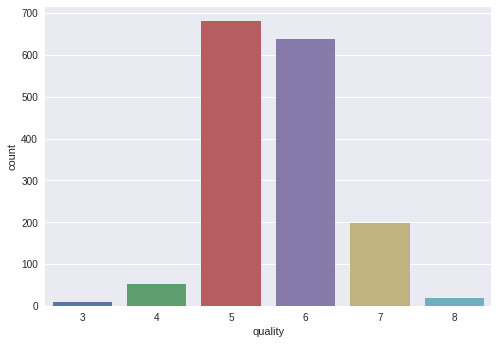

In [77]:
import seaborn as sns
ax = sns.countplot(x='quality', data=df)

Я думаю,что количество представителей разных классов очень неравномерно,из за чего обучающая модель может ошибаться


In [0]:
y=df['quality']
x=df.drop(['quality'],axis=1)

In [79]:
y

0       5
1       5
2       5
3       6
4       5
5       5
6       5
7       7
8       7
9       5
10      5
11      5
12      5
13      5
14      5
15      5
16      7
17      5
18      4
19      6
20      6
21      5
22      5
23      5
24      6
25      5
26      5
27      5
28      5
29      6
       ..
1569    6
1570    6
1571    6
1572    5
1573    6
1574    6
1575    6
1576    6
1577    6
1578    6
1579    5
1580    6
1581    5
1582    5
1583    5
1584    7
1585    6
1586    6
1587    6
1588    6
1589    5
1590    6
1591    6
1592    6
1593    6
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

### 1.2 Сравнение моделей (4 балла)

Задача классификации. Все признаки уже числовые. Значит можно пробовать просто все модели и выбрать лучшую. Так и поступим, сделайте кросс валидацию на 5 фолдах, используя `sklearn.model_selection.KFold` как аргумент у `cross_val_score`. Метрика качества будет `accuracy`.

Алгоритмы для тестирования:
- KNeighborsClassifier с 10 соседями
- KNeighborsClassifier с 10 соседями и масштабированием StandartScaler
- RidgeClassifier
- DecisionTreeClassifier 
- BaggingClassifier c 100 деревьев
- BaggingClassifier с 100 деревьев и каждое дерево обучается только по половине случайно выбранных признаков (см аргументы)
- RandomForestClassifier c 100 деревьев

Выведите среднее значение метрики качества для каждого из классификаторов. 

**hint**: каждый следующий алгоритм, будет показывать качество лучше, чем предыдущий. Если у вас не так - то что-то вы делаете неправильно. Везде зафиксируйте random_state=42.

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
supercv = KFold(n_splits=5, random_state=42, shuffle=True)


In [81]:
model = KNeighborsClassifier()
cross_val_score(model,X=x,y=y,cv =supercv )


array([0.45625   , 0.53125   , 0.50625   , 0.509375  , 0.50470219])

In [82]:
from sklearn.preprocessing import StandardScaler
x_s= StandardScaler()
x_s.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [83]:

clfs=[ KNeighborsClassifier(n_neighbors=10),
      KNeighborsClassifier(n_neighbors=10),
      RidgeClassifier(random_state=42),
      DecisionTreeClassifier(random_state=42),
      BaggingClassifier(	n_estimators=100,random_state = 42),
       BaggingClassifier(	n_estimators=100,max_features=0.5,random_state=42),
      RandomForestClassifier(n_estimators =100,random_state=42)]
cross = []
k=0

for clf in clfs:
  if (k == 1):
    a = cross_val_score(clf,X=x_s.transform(x),y=y,cv=supercv)
  else:
    a = cross_val_score(clf,X=x,y=y,cv =supercv)
  cross.append(a)
  print('Имя модели обучения',clf.__class__.__name__)
  print('результаты кросвалидации:',a)
  print('среднее:',a.mean())
  print('отклонение:',(a.std()))
  print('\n\n\n')
  k+=1


Имя модели обучения KNeighborsClassifier
результаты кросвалидации: [0.48125    0.534375   0.5        0.49375    0.55172414]
среднее: 0.5122198275862069
отклонение: 0.02646141016093271




Имя модели обучения KNeighborsClassifier
результаты кросвалидации: [0.578125   0.58125    0.559375   0.575      0.60501567]
среднее: 0.5797531347962382
отклонение: 0.014703387246407617




Имя модели обучения RidgeClassifier
результаты кросвалидации: [0.56875    0.571875   0.546875   0.56875    0.66144201]
среднее: 0.5835384012539185
отклонение: 0.03996649901617024




Имя модели обучения DecisionTreeClassifier
результаты кросвалидации: [0.559375   0.615625   0.61875    0.6625     0.63322884]
среднее: 0.6178957680250783
отклонение: 0.03363095895166169




Имя модели обучения BaggingClassifier
результаты кросвалидации: [0.640625   0.7        0.684375   0.715625   0.73667712]
среднее: 0.6954604231974921
отклонение: 0.032421733218408647




Имя модели обучения BaggingClassifier
результаты кросвалидации: 

### 1.3 Расуждения (8 баллов)

Ответьте на вопросы развернуто, можете полистать литературу:

- почему наблюдается значимая разница в качестве у KNeighborsClassifier с масштабированием и без
- почему масштабирование не важно для деревьев решений
- почему бэггинг на половине признаков для каждого дерева дал качество предсказания больше, чем на всех? (а он дал!)
- у какой модели наибольшей отклонение от среднего качества предсказаний? А почему??

1) KNeighborsClassifier использует идею того,что объекты с похожимы свойтсвами находятся ближе,standartscale приводит все отклонения в очень малый диапозон величин,тем самым мы избегаем ситуации когда у признака есть отклонение,которое на несколько порядков больше,чем у других ,что может вызвать доминацию этого признака в нашей модели обучения и привести к ошибочным выводам.


2) При обработки количественного признака деревья решений разбивают этот признак по возрастанию и в дереве проверяются лишь те пороги,при которых целевой признак меняет свое значения,эти пороги не будут зависить от отклонения,а следовательно оно не имеет значения в данной моделе обучения,а следовательно масштабирование не нужно


3)Из за того,что ,вероятно,алгоритм поиска оптимальных признаков исключил те признаки,по которым разбиения на узлы было бы неэффективным,тем самым улучшил критерии для разбиения деревьев,тем самым улучшил качество предсказания

4) больше  всего отклонение  у KNeighborsClassifier без масштабирование,т.к. KNeighborsClassifier использует идею того,что объекты с похожимы свойтсвами находятся ближе, и так получается что признаки имеют разные масштабы,и поэтому разные диапозоны отклонения,в связи с чем некоторые признаки становятся доминантными в предсказаниях,что приводит к ошибки


## 2 Переобучение и Ко

В последнем задании вы уже заметили, что случайный лес может вести себя немного нестабильно. В этом задании мы возьмем опять датасет MNIST(простите) и будем его решать деревьями. Почему мы взяли его? Потому что в нем фактически много разных признаков (значения пикселей в пространстве), а деревья строятся делая разбиения по признакам. Обычно на эти разбиения не обращают внимание, так как главное что тюнят - это глубина дереьвев, количество деревьев, а кучу других параметров обходят стороной, так как они "неясные". Попробуем прояснить их.

### 2.1 Загрузка датасета (1 балл)

Загрузите датасет с помощью функции `sklearn.datasets.load_digits`. В нем будут 64px картинки в векторной форме.

Нарисуйте первые 10 цифр в одной ячейке, чтобы было красиво.

In [0]:
from sklearn.datasets import load_digits
digits = load_digits()

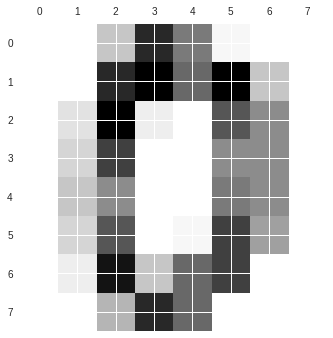

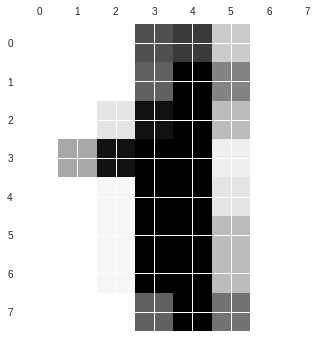

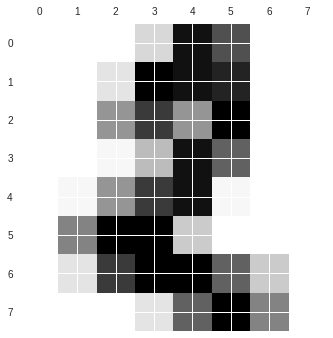

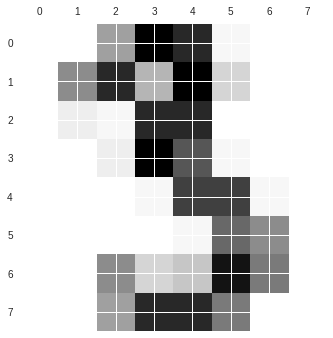

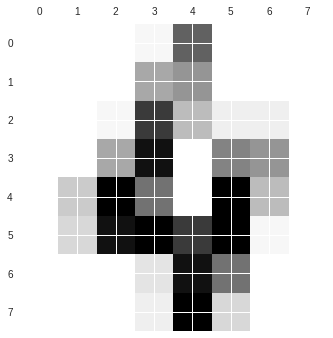

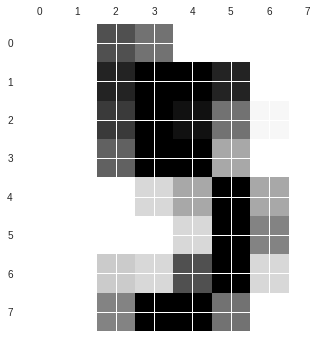

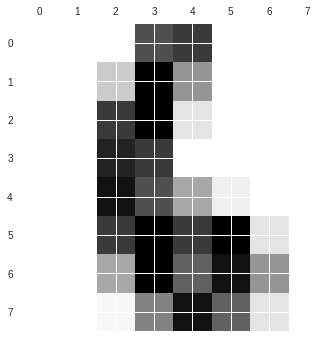

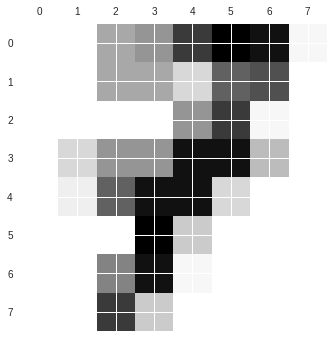

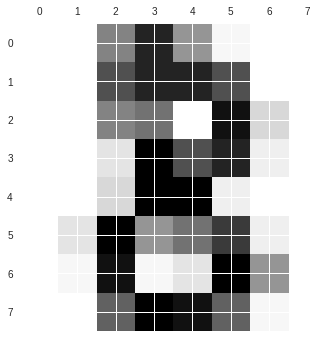

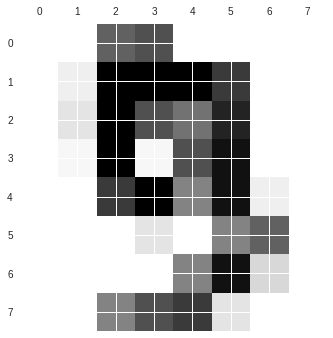

In [0]:
digits.data
import matplotlib.pyplot as plt
for i in range(10):
  plt.matshow(digits.images[i]) 
  plt.show()

In [0]:
X = digits.data
Y = digits.target

### 2.2 Перебор классификаторов (3 балла)

В этом задании вам снова придется перебрать несколько классификаторов, но теперь мы обратим внимание на другие гиперпараметры и их влияние на качество классификации, кстати опять `accuracy`.

Сделайте кроссвалидацию на 10 фолдах, указав `cv=10` для следующих классификаторов:

- DecisionTreeClassifier с параметрами по-умолчанию
- BaggingClassifier с 100 деревьвев
- BaggingClassifier с 100 деревьев, НО с ограничением на максимальное количество признаков, участвующих при обучении каждого из деревьев в $\sqrt{N}$, где $N$ - это число признаков.
- BaggingClassifier с 100 деревьев, НО с ограничением на количество признаков участвующих в разбиении для каждого из деревьев в $\sqrt{N}$, где $N$ - это число признаков. Это отличается от предыдущей модели тем, где ограничивается `max_features`. Читайте документацию :trollface:
- обычный случайный лес со 100 деревьями

In [0]:
supercv = KFold(n_splits=10, random_state=42, shuffle=True)


In [0]:
clfs = [DecisionTreeClassifier(random_state=42),
             BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=100), 
             BaggingClassifier(DecisionTreeClassifier(random_state=42, max_features=int(np.sqrt(X.shape[1]))), n_estimators=100), 
             BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=100, max_features=int(np.sqrt(X.shape[1]))), 
             RandomForestClassifier(n_estimators=100)]

In [0]:
for clf in clfs:
  a = cross_val_score(clf,X=X,y=Y,cv =supercv)
  cross.append(a)
  print('Имя модели обучения',clf.__class__.__name__)
  print('результаты кросвалидации: \n',a)
  print('среднее:',a.mean())
  print('отклонение:',(a.std()))
  print('\n\n\n')
  k+=1

Имя модели обучения DecisionTreeClassifier
результаты кросвалидации: 
 [0.86111111 0.85555556 0.86111111 0.83333333 0.87222222 0.82222222
 0.86666667 0.8603352  0.83240223 0.8603352 ]
среднее: 0.8525294847920547
отклонение: 0.01599405007513365




Имя модели обучения BaggingClassifier
результаты кросвалидации: 
 [0.94444444 0.97222222 0.96111111 0.94444444 0.93888889 0.90555556
 0.97222222 0.9273743  0.94972067 0.96089385]
среднее: 0.947687771570453
отклонение: 0.019618402728385716




Имя модели обучения BaggingClassifier
результаты кросвалидации: 
 [0.97777778 0.97222222 0.98333333 0.97777778 0.96111111 0.96111111
 0.98888889 0.97765363 0.97206704 0.98324022]
среднее: 0.9755183116076971
отклонение: 0.008672687751800053




Имя модели обучения BaggingClassifier
результаты кросвалидации: 
 [0.95555556 0.95555556 0.95555556 0.92777778 0.93333333 0.96111111
 0.95       0.96089385 0.96648045 0.94972067]
среднее: 0.9515983860955928
отклонение: 0.011629553590408832




Имя модели обучения R

### 2.3 В чём разница? (3 балла)

Ответье на вопрос: 

Странно то как? Почему ограничение на количество признаков в разбиении дерева и ограничение в количестве признаков для построения каждого дерева в BaggingClasifier дало СОВСЕМ разный результат в качестве предсказания? В чем магия?

![](https://i.ytimg.com/vi/_5GWMIAHc08/hqdefault.jpg)

Ну я бы не сказал что результат прям КООРДИНАЛЬНО СОВСЕМ разный,но да,действительно имеется улучшение в качестве предсказания.Вероятно,это связанно с тем,что .BaggingClassifier  использует совокупности деревьев,где у каждой свои алгоритмы для поиска оптимального значения для разбиения узла дерева,если мы ограничеваем количество признаков,которые следует учитывать для всех деревьев,то
BaggingClassifier,по всей видимости будет сам решать какие признаки оптимальны для разбиения,тогда как ,если указать для каждой модели дерева ограниченность,то она будет выбирать из всех,что лучше подойдет конкретно под нее.Иного объяснения трудно найти,ведь если бы это не влияло на то,какие именно признаки выбирать для разбиения для всех деревьев,а  не для каждого отдельно и дело было бы только в количестве,то указывать количество можно было бы где угодно и никакой магии бы не было,и результат был одинаковый,значит дело должно быть в этом,правда я из документации не смог понять как именно происходит в BaggingClassifier выбор нужных признаков,при указании количества...


### 2.4 Количество деревьев (2 балла)

Сделайте перебор количества деревьев для `RandomForestClassifier`. Сохраните качества кросс валидации на 10 фолдах для `[1,5,10,15,50,100,150,200,300]` количества деревьев. Нарисуйте график, где по оси x - количество деревьев, а по оси y - качество. При каком количестве деревьев получается самое хорошее качество?

In [0]:
p= []
tree = [1,5,10,15,50,100,150,200,300,400,500,600,700,800]
for i in tree:
  model = RandomForestClassifier(n_estimators=i,random_state=42)
  a = cross_val_score(model,X=X,y=Y,cv =supercv)
  p.append(a.mean())
  

In [0]:
p

[0.790707635009311,
 0.9153941651148354,
 0.9488019863438858,
 0.9577001862197392,
 0.9760800744878957,
 0.9794196151458723,
 0.9805307262569833,
 0.9783054003724395,
 0.9771880819366853]

<function matplotlib.pyplot.show>

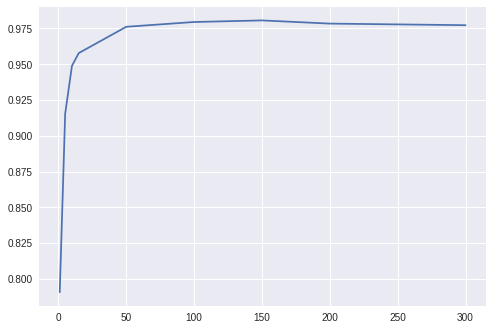

In [0]:
fig = plt.figure()
plt.plot(tree,p)
plt.show

### 2.5 Количество признаков  (2 балла)

Переберите теперь максимальное количество признаков для `RandomForestClassifier` на 100 деревьях, от 1 до 64 с шагом 5. Постройте график качества по кроссвалидации на 10 фолдах.

In [0]:
p= []
tree = np.arange(4,65,5)
#tree = range(1,64,5)
for i in tree:
  model = RandomForestClassifier(n_estimators=100, max_features=i)
  a = cross_val_score(model,X=X,y=Y,cv =supercv)
  p.append(a.mean())
  


In [0]:
print(tree,p)

[ 4  9 14 19 24 29 34 39 44 49 54 59 64] [0.9738516449410304, 0.9744040968342643, 0.9755183116076971, 0.9710614525139665, 0.9682774674115455, 0.9716170080695219, 0.9693947858472998, 0.967163252638113, 0.9654965859714462, 0.9604872749844816, 0.9515735567970204, 0.9521477343265052, 0.949366852886406]


<function matplotlib.pyplot.show>

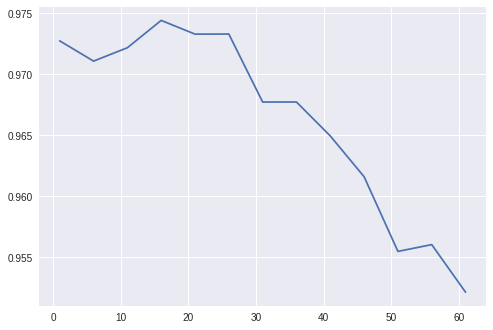

In [0]:
fig = plt.figure()
plt.plot(tree,p)
plt.show

### 2.5 Вопросы по RandomForest (8 баллов)

Ответьте на вопросы:

- Что происходит с ростом числа деревьев у случайного леса. Можно ли просто всегда брать 5000 деревьев и быть счастливым?
- Как зависит качество предсказания в дереве в зависимости от max_features?
- Почему качество зависит от max_features?
- Как глубина деревьев влияет на качество случайного леса?

1) Естественно можно,но маловероятно,что это будет рационально,особого улучшения на практике не наблюдается,по графику ниже,это прям очень четко можно увидеть.Почему не наблюдается улучшения при большом количестве деревьев ? Т.к. случайный лес выбирает среднее,строя деревья по разным алгоритмам,то вероятно,с какого то определенного количества деревьев абсолютное большинство будет давать верный вывод.Так же это может быть из за того,что ограниченно количетсво признаков,и в целом разбиения у деревьев будут повторятся,из за чего они будут давать одинаковый результат,но на счет этого я не уверен.

2) Зависимость хоршая,явно прослеживается,что график сначало растет положительно,с просадками,а потом убывает,по всей видимости,деревьям,гораздо проще строить внутренние разделы узлов,по цветам некоторых пикселей,чем по большему количеству,судя по графику,оптимальное количество пикселей,по которым удобно разбивать узлы,для  классификации  картинок - 14.

3)max_features - параметр,отвечающий за максимальное количество параметров,которые следует учитывать,при разбиении внутрених узлов,по которым делается выбор в дереве.То есть этот параметр прямо влияет на качество,ведь он влияет на то,какие именно будут узлы в деревьях,а узлы в деревьях и есть то,что будет анализировать данные и классифицировать их.

4)Глубина деревьев очень сильно влияет на качество обучения случайного леса,ведь если у нас будет маленькая глубина,то мы можем не охватить ту или иную информацию о выборочном пространстве и  делать предсказания неверно,а если глубина будет огромная,то появятся кучу участков дерева,которые имеют маленький вес для предсказания,что недобавляет полезности в предсказании,но крайне усложняет алгоритм,что очень и очень плохо


<function matplotlib.pyplot.show>

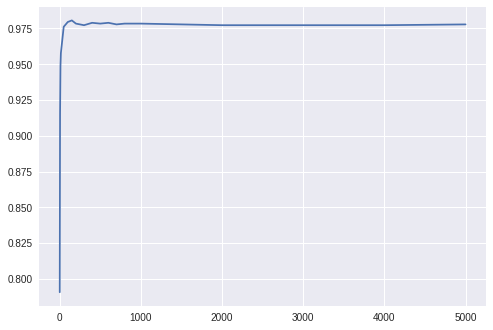

In [0]:
p= []
tree = [1,5,10,15,50,100,150,200,300,400,500,600,700,800,1000,2000,3000,4000,5000]
for i in tree:
  model = RandomForestClassifier(n_estimators=i,random_state=42)
  a = cross_val_score(model,X=X,y=Y,cv =supercv)
  p.append(a.mean())
fig = plt.figure()
plt.plot(tree,p)
plt.show

![](https://habrastorage.org/web/ad8/366/a44/ad8366a4469346c6b2e1306495b05d1a.jpg)